In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import normalize,scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import keras

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
dfmeta=pd.read_csv('Meta.csv')

In [4]:
dftrain=pd.read_csv('Train.csv')

In [5]:
dftest=pd.read_csv('Test.csv')

In [6]:
dfmeta

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [7]:
dftrain

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [8]:
dftest

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [9]:
Train_path = r"D:\kodlar\Lecture proggraming\ödevler\CAPSTONE PROJECT\Train\toplu"
Test_path = r"D:\kodlar\Lecture proggraming\ödevler\CAPSTONE PROJECT\Test"

Train = os.listdir(Train_path)
Test = os.listdir(Test_path)

for i, name in enumerate(Train):
    if name[-3:] != "png":
        print(f'{i} : {name}')
        print('Removed : ', Train.pop(i))
        break

for i, name in enumerate(Test):
    if name[-3:] != "png":
        print(f'{i} : {name}')
        print('Removed : ', Test.pop(i))
        break
        
print("Train = ", len(Train))
print("Test = ", len(Test))
print("Total = ", len(Train)+len(Test))

12630 : GT-final_test.csv
Removed :  GT-final_test.csv
Train =  37349
Test =  12630
Total =  49979


Test


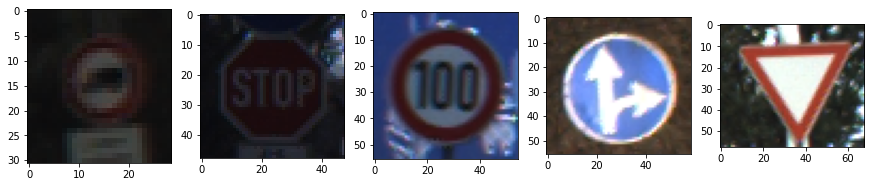

In [10]:
import random

view_test = random.sample(Test, 5)

print("Test")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = Test_path + '/' + view_test[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

Train


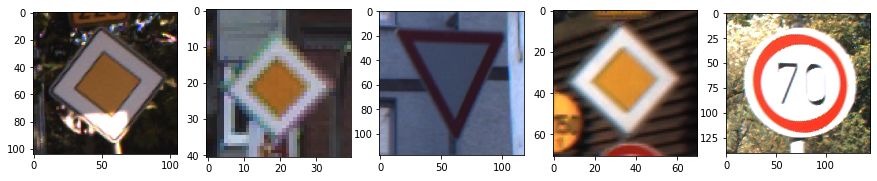

In [11]:
view_train = random.sample(Train, 5)

print("Train")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = Train_path + '/' + view_train[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

In [12]:
cells = list()
label = list()

IMG_SIZE = (64, 64)

try:
    cells = np.load('cells.npy')
    label = np.load('label.npy')
except FileNotFoundError:
    print("Processed files not found. \nProcessing...")

    for name in tqdm(Test):
        path = Test_path + '/' + name
        image = Image.open(path)
        image_data = np.array(image.resize(IMG_SIZE))
        cells.append(image_data)
        label.append(1)


    for name in tqdm(Train):
        path = Train_path + '/' + name
        image = Image.open(path)
        image_data = np.array(image.resize((64,64)))
        cells.append(image_data)
        label.append(0)


    cells = (np.array(cells).astype(float))/255
    label = np.array(label)
    
    np.save('cells.npy', cells)
    np.save('label.npy', label)

print(f'Cells Shape: {cells.shape} | Cells Dtype : {cells.dtype}')
print(f'Labels Shape: {label.shape} | Labels Dtype : {label.dtype}')

Cells Shape: (49979, 64, 64, 3) | Cells Dtype : float64
Labels Shape: (49979,) | Labels Dtype : int32


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(cells, label, test_size = 0.2,random_state=42)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((39983, 64, 64, 3), (9996, 64, 64, 3), (39983,), (9996,))

In [16]:
cells.shape,label.shape

((49979, 64, 64, 3), (49979,))

In [17]:
model=keras.Sequential([keras.layers.InputLayer(input_shape=(64,64,3)),
                        keras.layers.Reshape(target_shape=(64,64,3)),
                        keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation=tf.nn.relu),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(43,activation='softmax')
                        ]) # CNN-Convolutional Neural Network

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,validation_split=0.1,epochs=50)

Epoch 1/50


C:\Users\bilal\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1125/1125 [==============================] - 19s 17ms/step - loss: 0.5725 - accuracy: 0.7460 - val_loss: 0.5477 - val_accuracy: 0.7454
Epoch 2/50
1125/1125 [==============================] - 18s 16ms/step - loss: 0.5320 - accuracy: 0.7576 - val_loss: 0.5380 - val_accuracy: 0.7489
Epoch 3/50
1125/1125 [==============================] - 18s 16ms/step - loss: 0.5145 - accuracy: 0.7645 - val_loss: 0.5409 - val_accuracy: 0.7554
Epoch 4/50
1125/1125 [==============================] - 18s 16ms/step - loss: 0.4963 - accuracy: 0.7721 - val_loss: 0.5254 - val_accuracy: 0.7594
Epoch 5/50
1125/1125 [==============================] - 18s 16ms/step - loss: 0.4808 - accuracy: 0.7806 - val_loss: 0.5034 - val_accuracy: 0.7722
Epoch 6/50
1125/1125 [==============================] - 19s 17ms/step - loss: 0.4671 - accuracy: 0.7863 - val_loss: 0.4945 - val_accuracy: 0.7702
Epoch 7/50
1125/1125 [==============================] - 20s 18ms/step - loss: 0.4567 - accuracy: 0.7899 - val_loss: 0.5084 - val_accura

In [20]:
accuracy=model.evaluate(x_test,y_test,batch_size=128,verbose=1)

79/79 [==============================] - 2s 21ms/step - loss: 0.6328 - accuracy: 0.7660


In [22]:
import joblib

In [23]:
model.save('trafik_model')

INFO:tensorflow:Assets written to: trafik_model\assets


INFO:tensorflow:Assets written to: trafik_model\assets
